In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [6]:
df=pd.read_csv("Logistic_Iris.csv")
df.head()

,Sepal Length,Sepal Width,Petal Length,Peatal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
x=df.iloc[:,[0,1,2,3]].values
y=df.iloc[:,4].values

In [8]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.25, random_state=0)
sc=StandardScaler()
xtr=sc.fit_transform(xtr)
xts=sc.transform(xts)


In [11]:
#Decision Tree
dtree_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
dtree_gini.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [12]:
y_pred=dtree_gini.predict(xts)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [14]:
acc_dtree=accuracy_score(yts,y_pred)*100
print(acc_dtree)

89.47368421052632


In [15]:
cm=confusion_matrix(yts,y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


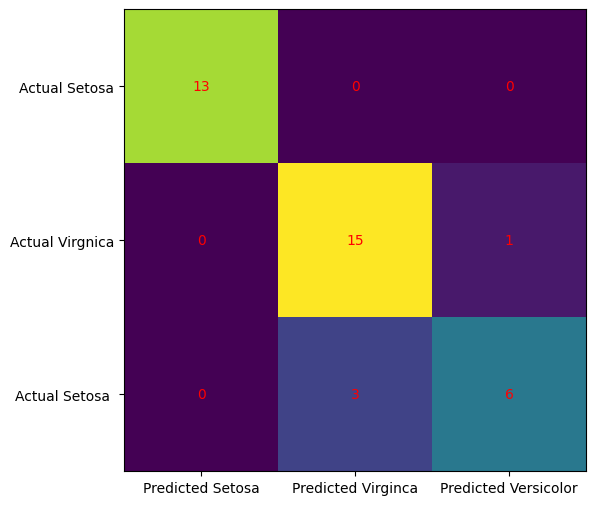

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted Setosa','Predicted Virginca','Predicted Versicolor'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual Setosa','Actual Virgnica','Actual Setosa '))
ax.set_ylim(2.5,-0.5)
for i in range(3):
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [19]:
print("\n\n Classification Report\n\n",classification_report(yts,y_pred))



 Classification Report

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



[Text(0.375, 0.875, 'x[2] <= -0.807\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 0.644\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.25, 0.375, 'x[3] <= 0.421\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.75, 0.375, 'x[3] <= 0.806\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [0, 1, 8]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

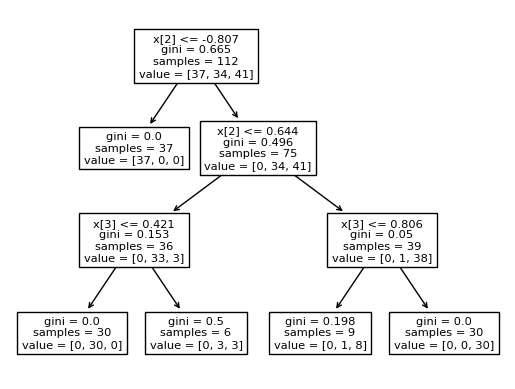

In [22]:
tree.plot_tree(dtree_gini)